In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [4]:
df.rename(columns={'Age_08_04': 'Age', 'cc': 'CC', 'Doors': 'Doors', 'Fuel_Type': 'FuelType'}, inplace=True)

In [5]:
# Step 4: EDA
print("Summary Statistics:\n", df.describe())
print("\nNull Values:\n", df.isnull().sum())
print("\nFuel Type Distribution:\n", df['FuelType'].value_counts())

Summary Statistics:
               Price          Age             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                CC        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min  

In [6]:
df.drop(columns=['Cylinders'], inplace=True)

In [7]:
df = pd.get_dummies(df, columns=['FuelType'], drop_first=True)

In [8]:
df['CC'] = df['CC'].clip(upper=2000)

In [9]:
X = df.drop(columns=['Price'])
y = df['Price']


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_pred1 = lr1.predict(X_test)

In [13]:
corr = pd.DataFrame(X,columns=df.drop(columns='Price').columns).corrwith(y).abs().sort_values(ascending=False)
top5_features = corr.head(5).index.tolist()

In [14]:
X_train2 = X_train[:, [df.columns.get_loc(col) - 1 for col in top5_features]]
X_test2 = X_test[:, [df.columns.get_loc(col) - 1 for col in top5_features]]

In [15]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train)
y_pred2 = lr2.predict(X_test2)

In [16]:
# Model 3: Only numerical features, exclude fuel types
numerical_cols = ['Age', 'KM', 'HP', 'CC', 'Weight', 'Doors', 'Gears', 'Automatic']
X3 = df[numerical_cols]
X3_scaled = scaler.fit_transform(X3)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3_scaled, y, test_size=0.2, random_state=42)

In [17]:
lr3 = LinearRegression()
lr3.fit(X_train3, y_train3)
y_pred3 = lr3.predict(X_test3)

In [18]:
# Step 12: Evaluate Models
def evaluate(y_true, y_pred, name):
    print(f"🔍 {name}")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print()

In [19]:
evaluate(y_test, y_pred1, "Model 1 (All Features)")
evaluate(y_test, y_pred2, "Model 2 (Top 5 Correlated Features)")
evaluate(y_test3, y_pred3, "Model 3 (Numerical Only)")

🔍 Model 1 (All Features)
MSE: 2050561.0651450856
RMSE: 1431.9780253708802
R2 Score: 0.8463169065204074

🔍 Model 2 (Top 5 Correlated Features)
MSE: 1990697.7822716476
RMSE: 1410.92089865862
R2 Score: 0.8508034710291229

🔍 Model 3 (Numerical Only)
MSE: 2090247.5933875616
RMSE: 1445.7688589077998
R2 Score: 0.8433425262235019



In [20]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)

In [21]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)

In [22]:
evaluate(y_test, y_ridge, "Ridge Regression")
evaluate(y_test, y_lasso, "Lasso Regression")

🔍 Ridge Regression
MSE: 2052146.74234854
RMSE: 1432.5315851137593
R2 Score: 0.8461980650081846

🔍 Lasso Regression
MSE: 2056464.7747626184
RMSE: 1434.0379265426066
R2 Score: 0.8458744420786262



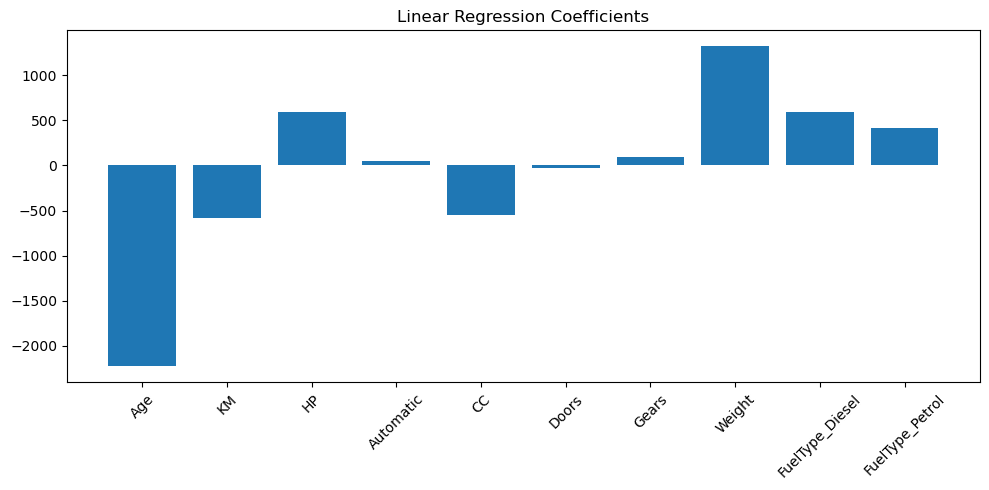

In [23]:
# Plotting Coefficients
plt.figure(figsize=(10, 5))
plt.bar(df.drop(columns=['Price']).columns, lr1.coef_)
plt.xticks(rotation=45)
plt.title("Linear Regression Coefficients")
plt.tight_layout()
plt.show()

In [24]:
# ========== INTERVIEW QUESTIONS ========== #
# 1. Normalization vs Standardization:
#    - Normalization scales values between 0 and 1.
#    - Standardization scales data to have mean = 0 and std = 1.
#    - Standardization is better for regression when data has outliers or isn't uniformly distributed.

# 2. Multicollinearity Techniques:
#    - Use VIF (Variance Inflation Factor) to detect it.
#    - Remove or combine correlated features.
#    - Use regularization methods like Ridge/Lasso.
